In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import math
%matplotlib inline

Nearest Neighbor
Let's use this example: classifying a song as either "rock" or "jazz". For this data we have measures of duration in seconds and loudness in loudness units (we're not going to be using decibels since that isn't a linear measure, which would create some problems we'll get into later).

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


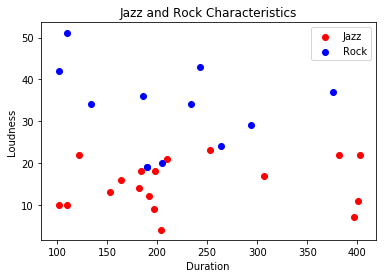

In [3]:
# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [4]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0], dtype=int64)

In [5]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[0.4 0.6]]


In [8]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

In [57]:

# Mesh size.
h = 1
# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - 2
x_max = X[:, 0].max() + 2
y_min = X[:, 1].min() - 2
y_max = X[:, 1].max() + 2
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])
x_min,xx.max()

(2, 52)

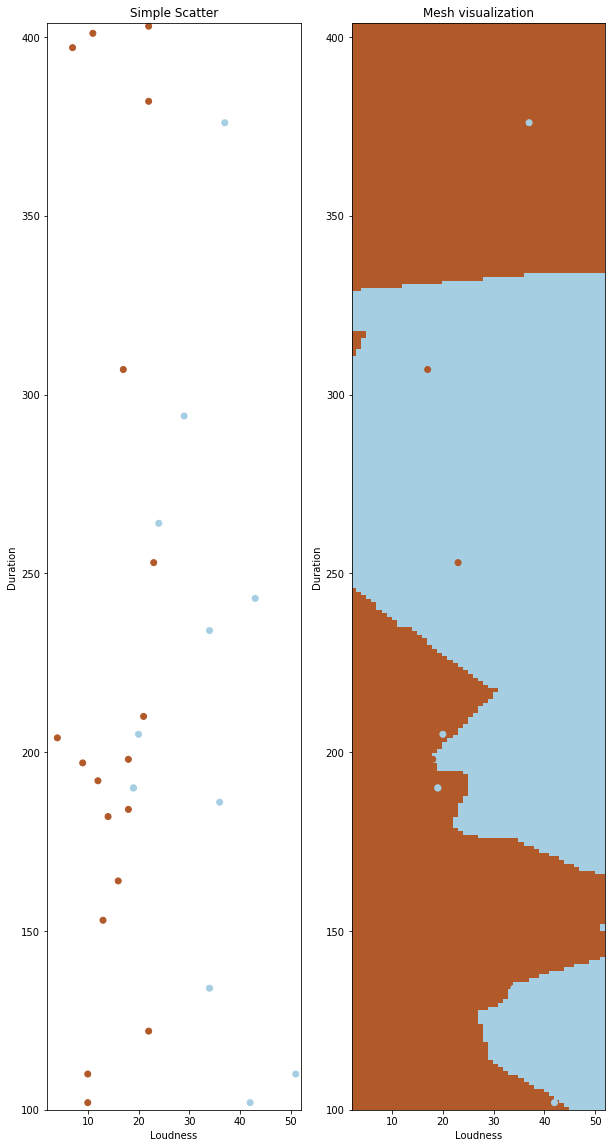

In [59]:

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 20))
plt.subplot(1, 2, 1)
plt.set_cmap(plt.cm.Paired)
#plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Simple Scatter')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.subplot(1, 2, 2)

plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

The Nearest Neighbor algorithm is extremely simple. So simple, in fact, that you should be able to build it yourself from scratch using the Python you already know. Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. 

In [66]:
music.head()

,duration,loudness,jazz
0,184,18,1
1,134,34,0
2,243,43,0
3,186,36,0
4,122,22,1


# Assignment: code your own KNN classifier

In [143]:

def predMusic(dur, loud, df, n):
    dist = pd.DataFrame(columns=['distance','type'])
    for index, row in df.iterrows():
        x = pd.Series([
                     math.sqrt((dur - row['duration'])**2 + (loud - row['loudness'])**2),
                     row['jazz']],
                     index=['distance','type'])
        dist = dist.append(x, ignore_index=True)
    
    voters = pd.DataFrame(dist.sort_values(by='distance').reset_index(drop=True).loc[0:n-1,:])
    
    probjazz = voters[voters.type==1]['type'].agg('count') / n
    probrock = voters[voters.type==0]['type'].agg('count') / n
    prediction = round(voters['type'].mean(),0)
    
    
    print("Prediction for duration of ",dur, "and loudness of ", loud, ": \n",prediction)
    print("% chance Rock: ", probrock)
    print("% chance Jazz: ", probjazz)              
    #Sklearn check
    neighbors = KNeighborsClassifier(n_neighbors=n)
    X = music[['loudness', 'duration']]
    Y = music.jazz
    neighbors.fit(X,Y)

    print('\nSklearn Check:')
    print(neighbors.predict([[loud, dur]]))
    print(neighbors.predict_proba([[loud, dur]]))
    print('-'*15,'\n')
        
        


# TEST

In [144]:
predMusic(175,5,music,5)
predMusic(350,23,music,12)
predMusic(126,3,music,1)
predMusic(80,34,music,4)
predMusic(140,50,music,9)
predMusic(105,18,music,7)

Prediction for duration of  175 and loudness of  5 : 
 1.0
% chance Rock:  0.2
% chance Jazz:  0.8

Sklearn Check:
[1]
[[0.2 0.8]]
--------------- 

Prediction for duration of  350 and loudness of  23 : 
 1.0
% chance Rock:  0.4166666666666667
% chance Jazz:  0.5833333333333334

Sklearn Check:
[1]
[[0.41666667 0.58333333]]
--------------- 

Prediction for duration of  126 and loudness of  3 : 
 1.0
% chance Rock:  0.0
% chance Jazz:  1.0

Sklearn Check:
[1]
[[0. 1.]]
--------------- 

Prediction for duration of  80 and loudness of  34 : 
 0.0
% chance Rock:  0.5
% chance Jazz:  0.5

Sklearn Check:
[0]
[[0.5 0.5]]
--------------- 

Prediction for duration of  140 and loudness of  50 : 
 1.0
% chance Rock:  0.4444444444444444
% chance Jazz:  0.5555555555555556

Sklearn Check:
[1]
[[0.44444444 0.55555556]]
--------------- 

Prediction for duration of  105 and loudness of  18 : 
 1.0
% chance Rock:  0.42857142857142855
% chance Jazz:  0.5714285714285714

Sklearn Check:
[1]
[[0.42857143 0.5